# Data Dictionary

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Field Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">id</td>
    <td class="tg-7zrl">string / unique identifier</td>
    <td class="tg-0lax">A unique identifier for each research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">title</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">The title of the research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">category</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">The arXiv category to which the paper is classified, such as 'Machine Learning' or 'Artificial Intelligence'.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">category_code</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">The coded representation for the category of the paper, e.g., 'cs.LG' for Machine Learning and 'cs.AI' for Artificial Intelligence.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">published_date</td>
    <td class="tg-7zrl">date / string</td>
    <td class="tg-0lax">The publication date of the research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">updated_date</td>
    <td class="tg-7zrl">date / string</td>
    <td class="tg-0lax">The last updated date for the paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">authors</td>
    <td class="tg-7zrl">string (list)</td>
    <td class="tg-0lax">A list of all authors who contributed to the research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">first_author</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">The first author mentioned in the paper's author list.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">summary</td>
    <td class="tg-7zrl">string</td>
    <td class="tg-0lax">A summary or abstract of the research paper.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">summary_word_count</td>
    <td class="tg-7zrl">integer</td>
    <td class="tg-0lax">The word count of the paper's summary.</td>
  </tr>
</tbody></table>

# Import necessary libraries

In [1]:
# Ensure contractions library is installed
! pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 3.9 MB/s eta 0:00:00


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arxiv-scientific-research-papers-dataset/arXiv_scientific dataset.csv


In [3]:
import pandas as pd
import numpy as np
import re
import string
import contractions
import nltk
from nltk.corpus import stopwords
import spacy
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
import umap
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

# Make sure to run this once to download the required NLTK data
try:
    stopwords_list = stopwords.words('english')
except nltk.downloader.DownloadError:
    print("Downloading 'stopwords' from NLTK. This will only run once.")
    nltk.download('stopwords')
    stopwords_list = stopwords.words('english')

# Make sure to load the spaCy model once
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading 'en_core_web_sm' from spaCy. This will only run once.")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Enable tqdm for pandas to show progress bars
tqdm.pandas()

2025-08-19 18:28:51.153048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755628131.400877      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755628131.470236      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load dataset

In [4]:
# Loading data
df = pd.read_csv('/kaggle/input/arxiv-scientific-research-papers-dataset/arXiv_scientific dataset.csv')
df = df.sample(frac=0.05, random_state=42)
df.head()

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
78358,abs-1704.04688v1,Machine Learning and the Future of Realism,Machine Learning (Statistics),stat.ML,4/15/17,4/15/17,"['Giles Hooker', 'Cliff Hooker']",'Giles Hooker',The preceding three decades have seen the emer...,106
37291,abs-2405.16697v1,CNN Autoencoder Resizer: A Power-Efficient LoS...,Machine Learning,cs.LG,5/26/24,5/26/24,"['Azim Akhtarshenas', 'Navid Ayoobi', 'David L...",'Azim Akhtarshenas',"Optimizing the design, performance, and resour...",143
132977,abs-2109.03754v2,Memory and Knowledge Augmented Language Models...,Computation and Language (Natural Language Pro...,cs.CL,9/8/21,9/14/21,"['David Wilmot', 'Frank Keller']",'David Wilmot',Measuring event salience is essential in the u...,115
69011,abs-2102.07318v4,A Global to Local Double Embedding Method for ...,Computer Vision and Pattern Recognition,cs.CV,2/15/21,10/17/21,"['Yiming Xu', 'Jiaxin Li', 'Yiheng Peng', 'Yan...",'Yiming Xu',Multi-person pose estimation is a fundamental ...,212
57403,abs-1812.05788v2,AU R-CNN: Encoding Expert Prior Knowledge into...,Computer Vision and Pattern Recognition,cs.CV,12/14/18,8/25/19,"['Chen Ma', 'Li Chen', 'Junhai Yong']",'Chen Ma',Detecting action units (AUs) on human faces is...,245


In [5]:
df = df[["title","category", "summary"]]
df.head()

,title,category,summary
78358,Machine Learning and the Future of Realism,Machine Learning (Statistics),The preceding three decades have seen the emer...
37291,CNN Autoencoder Resizer: A Power-Efficient LoS...,Machine Learning,"Optimizing the design, performance, and resour..."
132977,Memory and Knowledge Augmented Language Models...,Computation and Language (Natural Language Pro...,Measuring event salience is essential in the u...
69011,A Global to Local Double Embedding Method for ...,Computer Vision and Pattern Recognition,Multi-person pose estimation is a fundamental ...
57403,AU R-CNN: Encoding Expert Prior Knowledge into...,Computer Vision and Pattern Recognition,Detecting action units (AUs) on human faces is...


# Split data into train and test dataset

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

print("Shape of Train:", train.shape)
print("Shape of Test:", test.shape)

Shape of Train: (5449, 3)
Shape of Test: (1363, 3)


# Data Visualization

In [7]:
train

,title,category,summary
70405,Learning Occlusion-Aware Coarse-to-Fine Depth ...,Computer Vision and Pattern Recognition,"Self-supervised monocular depth estimation, ai..."
85225,Forecasting with sktime: Designing sktime's Ne...,Machine Learning,We present a new open-source framework for for...
121330,Topic-Aware Multi-turn Dialogue Modeling,Computation and Language (Natural Language Pro...,In the retrieval-based multi-turn dialogue mod...
96041,Improving the Improved Training of Wasserstein...,Computer Vision and Pattern Recognition,Despite being impactful on a variety of proble...
46239,Dominant Z-Eigenpairs of Tensor Kronecker Prod...,Social and Information Networks,"Tensor Kronecker products, the natural general..."
...,...,...,...
95172,A Robust Multi-Batch L-BFGS Method for Machine...,Optimization and Control,This paper describes an implementation of the ...
114928,Best-Worst Scaling More Reliable than Rating S...,Computation and Language (Natural Language Pro...,Rating scales are a widely used method for dat...
120365,Handling Syntactic Divergence in Low-resource ...,Computation and Language (Natural Language Pro...,Despite impressive empirical successes of neur...
110417,Using Recurrent Neural Networks to Optimize Dy...,Quantum Physics,We utilize machine learning models which are b...


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5449 entries, 70405 to 96386
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     5449 non-null   object
 1   category  5449 non-null   object
 2   summary   5449 non-null   object
dtypes: object(3)
memory usage: 170.3+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1363 entries, 36305 to 100946
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1363 non-null   object
 1   category  1363 non-null   object
 2   summary   1363 non-null   object
dtypes: object(3)
memory usage: 42.6+ KB


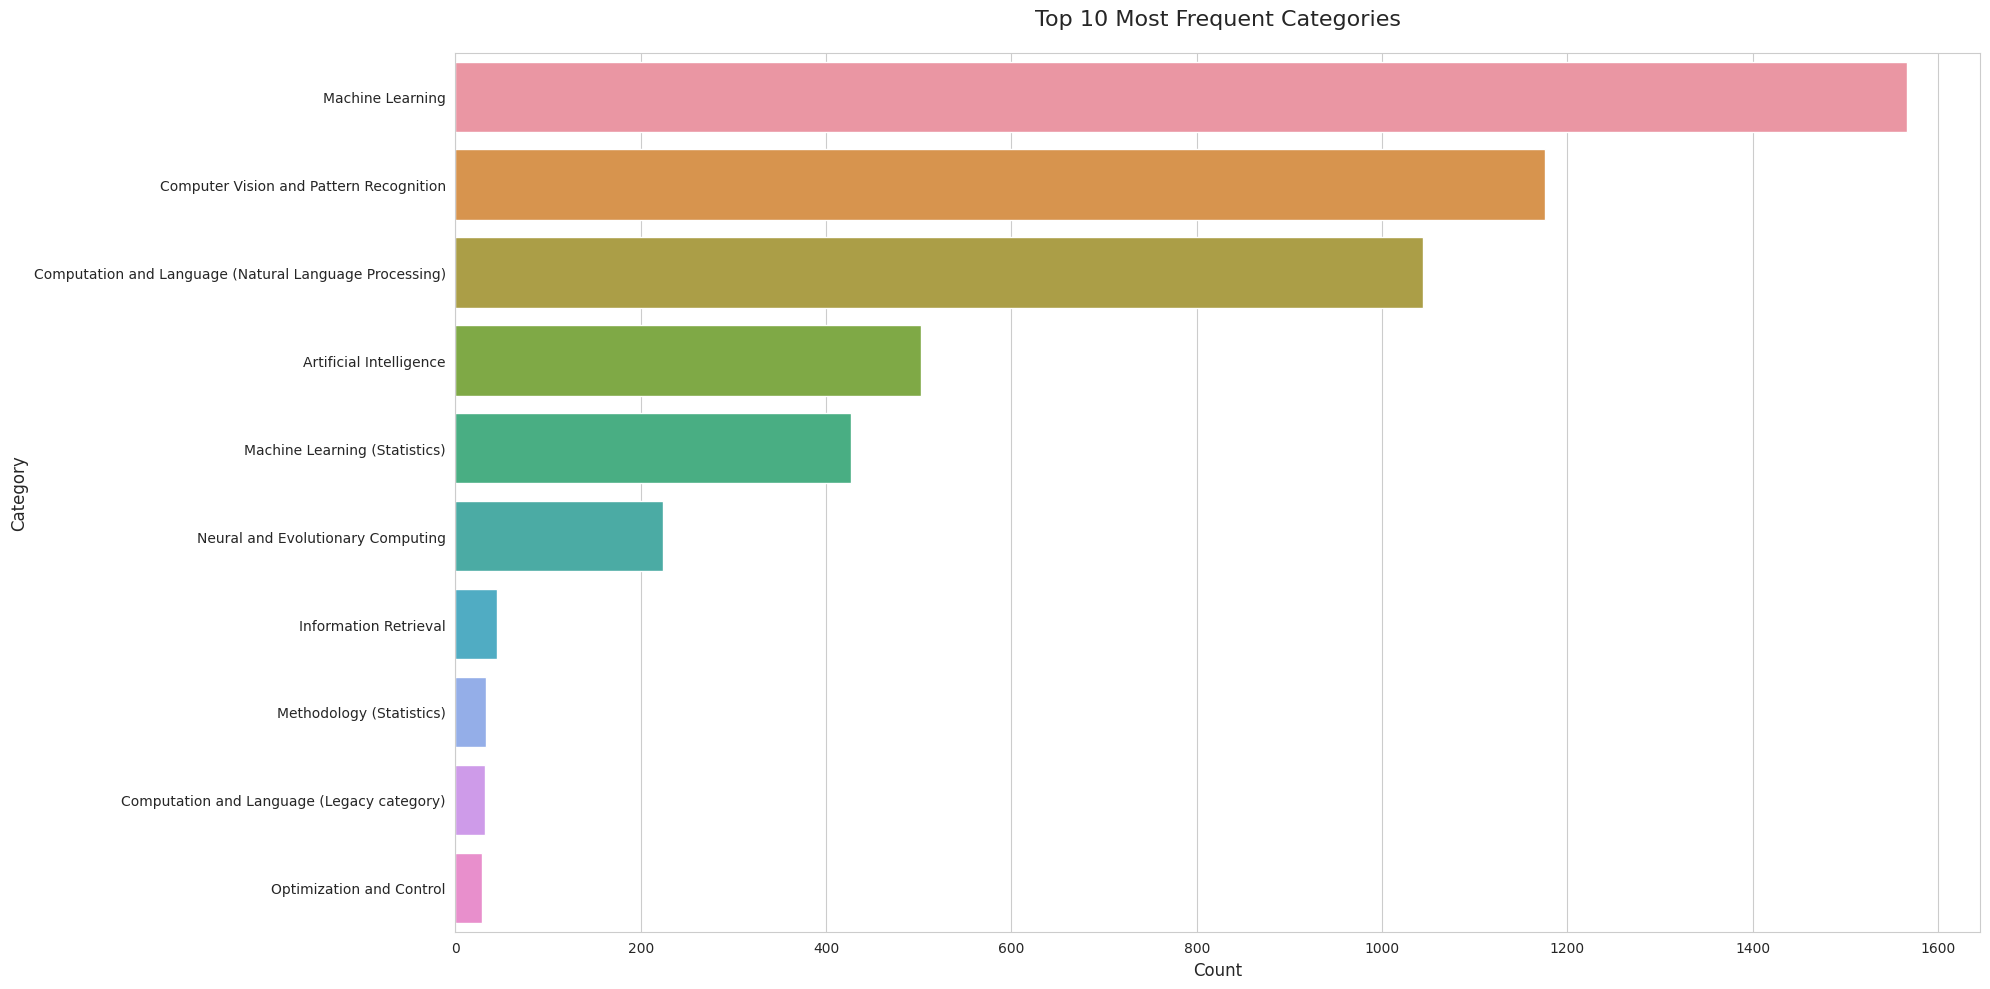

In [10]:
def visualize_top_categories(df):
    """
    Analyzes a DataFrame with a 'category' column to find the top 10
    most frequent categories and visualizes the results.

    Args:
        df (pd.DataFrame): DataFrame with a 'category' column.
    """
    # 1. Count the frequency of each category
    category_counts = df['category'].value_counts().reset_index()
    category_counts.columns = ['Category', 'Count']

    # 2. Find the Top 10 Categories with the highest counts
    top_10_categories = category_counts.nlargest(10, 'Count')

    # 3. Visualization
    # Set the style and palette for the plot
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    # Create a figure for the plot
    plt.figure(figsize=(20, 10))

    # Plot the horizontal bar chart
    sns.barplot(
        x='Count',
        y='Category',
        data=top_10_categories,
        orient='h'
    )

    # Add titles and labels for clarity
    plt.title('Top 10 Most Frequent Categories', fontsize=16, pad=20)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Category', fontsize=12)

    # Adjust layout to prevent labels from overlapping
    plt.tight_layout()
    plt.show()

visualize_top_categories(train)

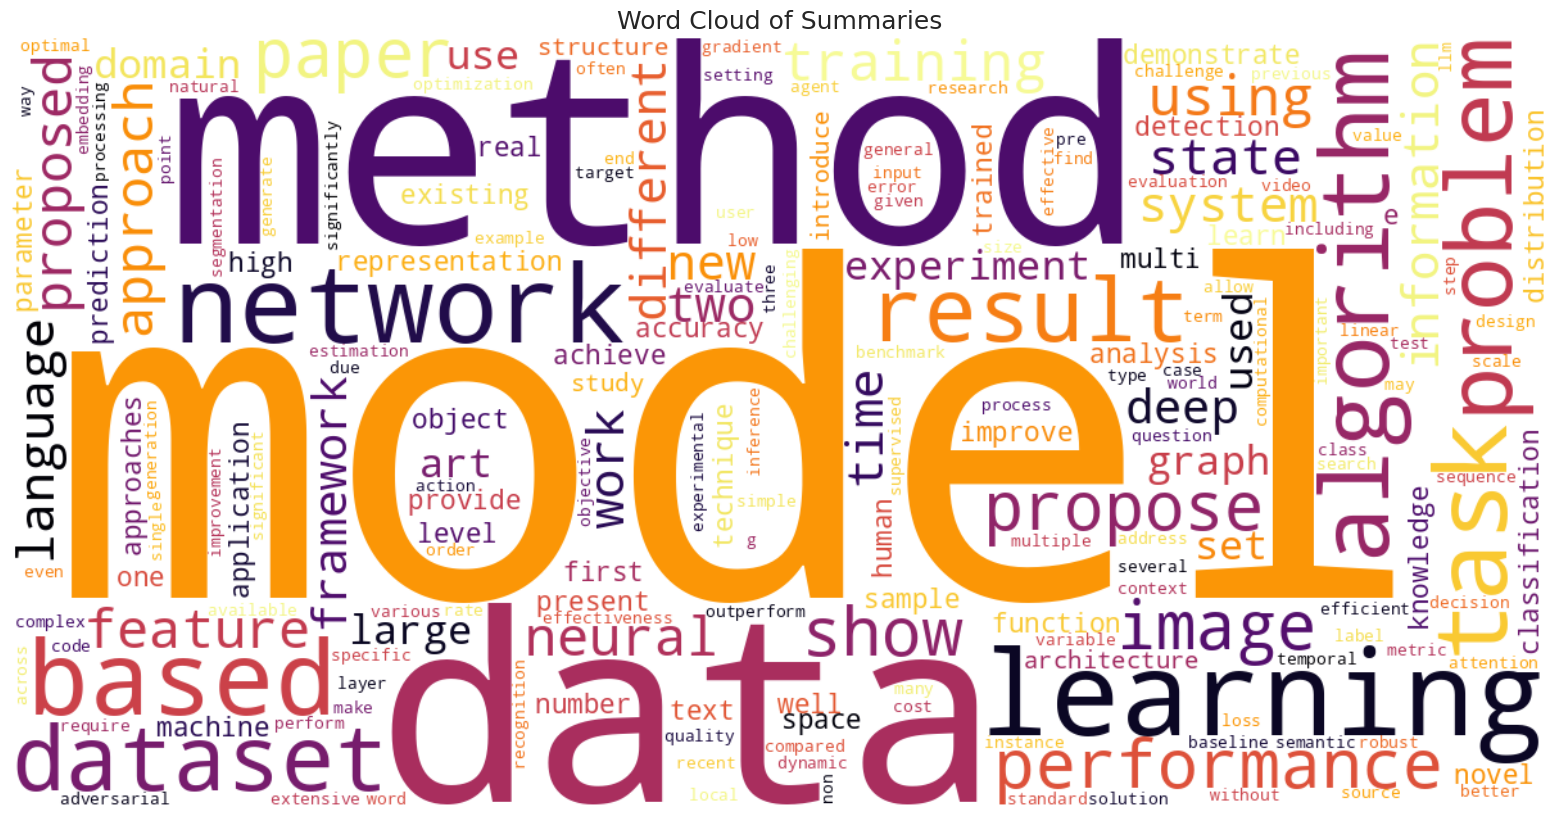

In [11]:
def create_wordcloud(df):
    """
    Generates and displays a word cloud from the 'summary' column of a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with a 'summary' column.
    """
    # 1. Prepare the text data.
    # We combine all summary text into one large string.
    # Drop NA values to ensure only valid strings are processed.
    all_text = ' '.join(
        df['summary']
        .astype(str)
        .str.lower()
        .dropna()
    )

    # 2. Generate the word cloud.
    # The 'width' and 'height' parameters control the size of the output image.
    # 'background_color' can be set to any color you prefer.
    # 'max_words' limits the number of words to display.
    # 'collocations=False' is used to prevent the word cloud from grouping
    # common pairs of words into a single entry.
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white',
        colormap='inferno',
        max_words=200,
        collocations=False
    ).generate(all_text)

    # 3. Display the generated image.
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes for a cleaner look
    plt.title('Word Cloud of Summaries', fontsize=18)
    plt.show()

create_wordcloud(train)

# Feature Engineering

In [12]:
x_train = train[["summary"]]
x_test = test[["summary"]]

# Print the shapes to verify the split
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)

Shape of X_train: (5449, 1)
Shape of X_test: (1363, 1)


## Text Cleaning

## Example of preprocess and visualize preprocess

In [13]:
# Define text cleaning function
def clean_text(text):
    """
    Performs basic text cleaning: contraction expansion, lowercase,
    punctuation/number/stopword removal.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text string.
    """
    # Check for NaN values and return an empty string if found.
    if pd.isna(text):
        return ''

    # 1. Ensure the input is a string.
    text = str(text)

    # 2. Expand contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Handle specific non-review entries
    if text.strip() in ['no negative', 'nothing', 'no positive']:
        return ''

    # 5. Remove punctuation and numbers
    text = re.sub(r'[\d' + re.escape(string.punctuation) + ']+', '', text)

    # 6. Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [
        word
        for word in words
        if word not in stop_words and len(word) > 1  # remove single-char words
    ]

    return ' '.join(cleaned_words)


# Define advanced spaCy-based preprocessing functions
def lemmatize_text(text):
    """
    Uses spaCy to perform lemmatization on a text string.
    
    Args:
        text (str): The text to process.

    Returns:
        str: The lemmatized text string.
    """
    # Create a spaCy Doc object
    doc = nlp(text)

    # Lemmatize and handle the special spaCy pronoun lemma "-PRON-"
    lemmas = [token.lower_ if token.lemma_ == "-PRON-" else token.lemma_ for token in doc]
    
    return " ".join(lemmas)

def filter_by_pos(text):
    """
    Filters a text string to keep only specified parts of speech.
    
    Args:
        text (str): The text string to filter.
        
    Returns:
        str: The filtered text string containing only allowed POS tags.
    """
    # Create a spaCy Doc object from the input text
    doc = nlp(text)

    # Define the parts of speech we want to keep.
    allowed_pos = {'NOUN', 'PROPN', 'ADJ', 'VERB'}

    # Filter tokens based on their POS tag.
    filtered_tokens = [token.text for token in doc if token.pos_ in allowed_pos]

    return " ".join(filtered_tokens)



# Apply the full preprocessing pipeline step-by-step
# A sample review text for demonstration.
sample_review = "We stayed at the Marriott hotel in New York City for 2 nights in August 2024. We booked the room through Expedia and were very pleased with the discount we received. The receptionist, a very kind Brazilian man named Carlos, made our check-in seamless. The hotel is located right next to Central Park. Overall, the staff were fantastic and we will be back!"

print("="*50)
print("Step 1: Original Review Text")
print("="*50)
print(sample_review)

# Apply the basic text cleaning function first.
cleaned_text = clean_text(sample_review)
print("\n" + "="*50)
print("Step 2: Cleaned Text")
print("="*50)
print(cleaned_text)

# Apply lemmatization to the cleaned text and display word-by-word.
lemmatized_doc = nlp(cleaned_text)
print("\n" + "="*50)
print("Step 3: Lemmatization Word-by-Word")
print("="*50)
for token in lemmatized_doc:
    print(f"{token.text} => {token.lemma_}")

lemmatized_text = " ".join([token.lower_ if token.lemma_ == "-PRON-" else token.lemma_ for token in lemmatized_doc])
print("\n" + "="*50)
print("Step 3: Lemmatized Text")
print("="*50)
print(lemmatized_text)


# Show the Part-of-Speech (POS) tags for each word in the lemmatized text.
pos_doc = nlp(lemmatized_text)
print("\n" + "="*50)
print("Step 4: Part-of-Speech (POS) Tagging")
print("="*50)
for token in pos_doc:
    print(f"{token.text} => {token.pos_}")

# Apply POS filtering to the lemmatized text.
final_processed_text = filter_by_pos(lemmatized_text)
print("\n" + "="*50)
print("Step 5: Final Preprocessed Text (After POS Filtering)")
print("="*50)
print(final_processed_text)

Step 1: Original Review Text
We stayed at the Marriott hotel in New York City for 2 nights in August 2024. We booked the room through Expedia and were very pleased with the discount we received. The receptionist, a very kind Brazilian man named Carlos, made our check-in seamless. The hotel is located right next to Central Park. Overall, the staff were fantastic and we will be back!

Step 2: Cleaned Text
stayed marriott hotel new york city nights august booked room expedia pleased discount received receptionist kind brazilian man named carlos made checkin seamless hotel located right next central park overall staff fantastic back

Step 3: Lemmatization Word-by-Word
stayed => stay
marriott => marriott
hotel => hotel
new => new
york => york
city => city
nights => night
august => august
booked => book
room => room
expedia => expedia
pleased => pleased
discount => discount
received => receive
receptionist => receptionist
kind => kind
brazilian => brazilian
man => man
named => name
carlos =>

In [14]:
# --- Code for Data Preparation ---

def clean_text(text):
    """
    Performs basic text cleaning: contraction expansion, lowercase,
    punctuation/number/stopword removal.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text string.
    """
    # Check for NaN values and return an empty string if found.
    if pd.isna(text):
        return ''

    # 1. Ensure the input is a string.
    text = str(text)

    # 2. Expand contractions (e.g., "don't" -> "do not")
    text = contractions.fix(text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Remove punctuation and numbers
    text = re.sub(r'[\d' + re.escape(string.punctuation) + ']+', '', text)

    # 5. Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [
        word
        for word in words
        if word not in stop_words and len(word) > 1  # remove single-char words
    ]

    return ' '.join(cleaned_words)

def clean_dataframe(df, column_name):
    """
    Applies the text cleaning pipeline to a single DataFrame column.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        column_name (str): The name of the text column to clean.

    Returns:
        pd.DataFrame: A DataFrame with a new column for cleaned text.
    """
    cleaned_column_name = 'cleaned_' + column_name
    print(f"Applying text cleaning to '{column_name}' and creating a new column '{cleaned_column_name}'...")
    df[cleaned_column_name] = df[column_name].apply(clean_text)
    return df

# --- Apply provided preprocessing steps ---
x_train = clean_dataframe(x_train, 'summary')
x_test = clean_dataframe(x_test, 'summary')

Applying text cleaning to 'summary' and creating a new column 'cleaned_summary'...


/tmp/ipykernel_13/725629347.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cleaned_column_name] = df[column_name].apply(clean_text)


Applying text cleaning to 'summary' and creating a new column 'cleaned_summary'...


/tmp/ipykernel_13/725629347.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cleaned_column_name] = df[column_name].apply(clean_text)


## Lemmatization

In [15]:
# Define spaCy-based preprocessing functions

def lemmatize_text(text):
    """
    Uses spaCy to perform lemmatization on a text string.
    
    Args:
        text (str): The text to process.

    Returns:
        str: The lemmatized text string.
    """
    # Create a spaCy Doc object
    doc = nlp(text)

    # Lemmatize and handle the special spaCy pronoun lemma "-PRON-"
    lemmas = [token.lower_ if token.lemma_ == "-PRON-" else token.lemma_ for token in doc]
    
    return " ".join(lemmas)

# Then, apply the spaCy tokenizer for lemmatization to the cleaned column
print("\nApplying spaCy lemmatization...")
x_train['lemmatized_summary'] = x_train['cleaned_summary'].progress_apply(lemmatize_text)
x_test['lemmatized_summary'] = x_test['cleaned_summary'].progress_apply(lemmatize_text)
x_train


Applying spaCy lemmatization...


100%|██████████| 1363/1363 [00:32<00:00, 42.43it/s]


,summary,cleaned_summary,lemmatized_summary
70405,"Self-supervised monocular depth estimation, ai...",selfsupervised monocular depth estimation aimi...,selfsupervise monocular depth estimation aimin...
85225,We present a new open-source framework for for...,present new opensource framework forecasting p...,present new opensource framework forecasting p...
121330,In the retrieval-based multi-turn dialogue mod...,retrievalbased multiturn dialogue modeling rem...,retrievalbased multiturn dialogue modeling rem...
96041,Despite being impactful on a variety of proble...,despite impactful variety problems application...,despite impactful variety problem application ...
46239,"Tensor Kronecker products, the natural general...",tensor kronecker products natural generalizati...,tensor kronecker product natural generalizatio...
...,...,...,...
95172,This paper describes an implementation of the ...,paper describes implementation lbfgs method de...,paper describe implementation lbfgs method des...
114928,Rating scales are a widely used method for dat...,rating scales widely used method data annotati...,rating scale widely use method datum annotatio...
120365,Despite impressive empirical successes of neur...,despite impressive empirical successes neural ...,despite impressive empirical success neural ma...
110417,We utilize machine learning models which are b...,utilize machine learning models based recurren...,utilize machine learning model base recurrent ...


## POS Tagging

In [16]:
def filter_by_pos(text):
    """
    Filters a text string to keep only specified parts of speech.
    
    Args:
        text (str): The text string to filter.
        
    Returns:
        str: The filtered text string containing only allowed POS tags.
    """
    # Create a spaCy Doc object from the input text
    doc = nlp(text)

    # Define the parts of speech we want to keep.
    allowed_pos = {'NOUN', 'PROPN', 'ADJ', 'VERB'}

    # Filter tokens based on their POS tag.
    filtered_tokens = [token.text for token in doc if token.pos_ in allowed_pos]

    return " ".join(filtered_tokens)

print("\nApplying POS tagging and filtering...")
x_train['processed_summary'] = x_train['lemmatized_summary'].progress_apply(filter_by_pos)
x_test['processed_summary'] = x_test['lemmatized_summary'].progress_apply(filter_by_pos)
x_train


Applying POS tagging and filtering...


100%|██████████| 1363/1363 [00:31<00:00, 43.28it/s]


,summary,cleaned_summary,lemmatized_summary,processed_summary
70405,"Self-supervised monocular depth estimation, ai...",selfsupervised monocular depth estimation aimi...,selfsupervise monocular depth estimation aimin...,selfsupervise monocular depth estimation aimin...
85225,We present a new open-source framework for for...,present new opensource framework forecasting p...,present new opensource framework forecasting p...,present new opensource framework forecasting p...
121330,In the retrieval-based multi-turn dialogue mod...,retrievalbased multiturn dialogue modeling rem...,retrievalbased multiturn dialogue modeling rem...,retrievalbased multiturn dialogue modeling rem...
96041,Despite being impactful on a variety of proble...,despite impactful variety problems application...,despite impactful variety problem application ...,impactful variety problem application generati...
46239,"Tensor Kronecker products, the natural general...",tensor kronecker products natural generalizati...,tensor kronecker product natural generalizatio...,tensor kronecker product natural generalizatio...
...,...,...,...,...
95172,This paper describes an implementation of the ...,paper describes implementation lbfgs method de...,paper describe implementation lbfgs method des...,paper implementation lbfgs method design deal ...
114928,Rating scales are a widely used method for dat...,rating scales widely used method data annotati...,rating scale widely use method datum annotatio...,rating scale use method datum annotation prese...
120365,Despite impressive empirical successes of neur...,despite impressive empirical successes neural ...,despite impressive empirical success neural ma...,impressive empirical success neural machine tr...
110417,We utilize machine learning models which are b...,utilize machine learning models based recurren...,utilize machine learning model base recurrent ...,utilize machine learning model base recurrent ...


In [17]:
x_train = x_train[["processed_summary"]]
x_test = x_test[["processed_summary"]]

## Display full data after preprocessing

In [18]:
print("\n" + "="*50)
print("Data After Full Preprocessing:")
print("="*50)
print(x_train)


Data After Full Preprocessing:
                                        processed_summary
70405   selfsupervise monocular depth estimation aimin...
85225   present new opensource framework forecasting p...
121330  retrievalbased multiturn dialogue modeling rem...
96041   impactful variety problem application generati...
46239   tensor kronecker product natural generalizatio...
...                                                   ...
95172   paper implementation lbfgs method design deal ...
114928  rating scale use method datum annotation prese...
120365  impressive empirical success neural machine tr...
110417  utilize machine learning model base recurrent ...
96386   deep learning apply many securitysensitive app...

[5449 rows x 1 columns]


## Create a vocabulary and document-term matrix

In [19]:
# Create a vocabulary and document-term matrix
print("\n Creating a Document-Term Matrix (CountVectorizer)")
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(x_train['processed_summary'])
doc_term_matrix_test = vectorizer.transform(x_test['processed_summary'])
terms = vectorizer.get_feature_names_out()


 Creating a Document-Term Matrix (CountVectorizer)


## Document-Term Matrix to Gensim's Dictionary and Corpus format

In [20]:
# Convert the Document-Term Matrix to Gensim's Dictionary and Corpus format.
# A Dictionary maps each unique word to an integer ID.
# A Corpus is a list of lists, where each inner list contains (word_id, word_count) tuples for a document.
print("\nConverting Document-Term Matrix to Gensim format...")
gensim_dictionary = Dictionary.from_corpus(
    corpus=Sparse2Corpus(doc_term_matrix),
    id2word=dict(enumerate(terms))
)
gensim_corpus = [gensim_dictionary.doc2bow(doc.split()) for doc in x_train['processed_summary']]
print("Gensim Dictionary:", gensim_dictionary)
print("Example of Gensim Corpus (first document):", gensim_corpus[0])


Converting Document-Term Matrix to Gensim format...
Gensim Dictionary: Dictionary<24786 unique tokens: ['aa', 'aaai', 'aachen', 'aae', 'aaia']...>
Example of Gensim Corpus (first document): [(23, 1), (29, 1), (115, 1), (228, 2), (232, 1), (460, 1), (561, 1), (700, 1), (707, 1), (951, 1), (1198, 1), (1346, 1), (2318, 1), (2376, 1), (2449, 1), (3132, 1), (3135, 1), (3152, 1), (3367, 1), (3689, 3), (3772, 2), (4173, 1), (4869, 2), (4950, 13), (4996, 1), (5310, 2), (6003, 1), (6005, 1), (6016, 1), (6302, 1), (6305, 2), (6677, 3), (6836, 1), (6872, 2), (7314, 1), (7361, 2), (8168, 1), (8328, 1), (8760, 1), (9636, 1), (10050, 2), (10186, 1), (10415, 1), (10565, 1), (11337, 1), (11713, 5), (12512, 1), (12578, 1), (12592, 1), (12600, 4), (13190, 3), (13205, 2), (13697, 1), (13745, 2), (13972, 1), (14442, 1), (14507, 1), (15102, 1), (15273, 2), (15274, 2), (15292, 3), (15526, 1), (15774, 1), (15931, 1), (17277, 2), (17295, 1), (17426, 5), (18133, 1), (18136, 1), (18477, 1), (18649, 1), (18730,

## Tokenize word in dataset

In [21]:
tokenized_docs = [doc.split() for doc in x_train['processed_summary']]
tokenized_docs = [doc.split() for doc in x_test['processed_summary']]

# Modeling

## Latent Dirchlet Allocation (LDA) - GENSIM

In [22]:
# --- START of Gensim LDA Model Creation ---

# Train the LDA Model
# We will use 3 topics as an example. You can tune this parameter later.
num_topics = 5
print(f"\nTraining LDA model with {num_topics} topics...")
lda_model = LdaModel(
    corpus=gensim_corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics,
    random_state=100,
    passes=10,
    per_word_topics=True
)


Training LDA model with 5 topics...


## Results on 5 Sample Data Points (LDA)

In [23]:
# Print the topics and their top keywords
print("\n" + "="*50)
print("Discovered Topics:")
print("="*50)
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic: {idx+1} \nWords: {topic}\n")


Discovered Topics:
Topic: 1 
Words: 0.018*"algorithm" + 0.014*"problem" + 0.011*"model" + 0.011*"use" + 0.010*"method"

Topic: 2 
Words: 0.027*"network" + 0.016*"neural" + 0.009*"use" + 0.007*"model" + 0.006*"system"

Topic: 3 
Words: 0.021*"datum" + 0.014*"model" + 0.012*"method" + 0.011*"use" + 0.009*"propose"

Topic: 4 
Words: 0.024*"model" + 0.014*"language" + 0.011*"task" + 0.010*"use" + 0.007*"system"

Topic: 5 
Words: 0.015*"model" + 0.015*"network" + 0.014*"method" + 0.014*"image" + 0.013*"propose"



## LDA Visualization

In [24]:
# Get the document-topic distribution from the LDA model.
# This is the matrix that t-SNE needs.
doc_topic_matrix = lda_model.get_document_topics(gensim_corpus, minimum_probability=0.0)

# Convert the Gensim sparse format to a dense NumPy array.
num_topics = lda_model.num_topics
doc_topic_matrix_dense = np.zeros((len(gensim_corpus), num_topics))
for i, doc_topics in enumerate(doc_topic_matrix):
    for topic_id, score in doc_topics:
        doc_topic_matrix_dense[i, topic_id] = score


Visualizing Topics with UMAP

Creating UMAP embedding...


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


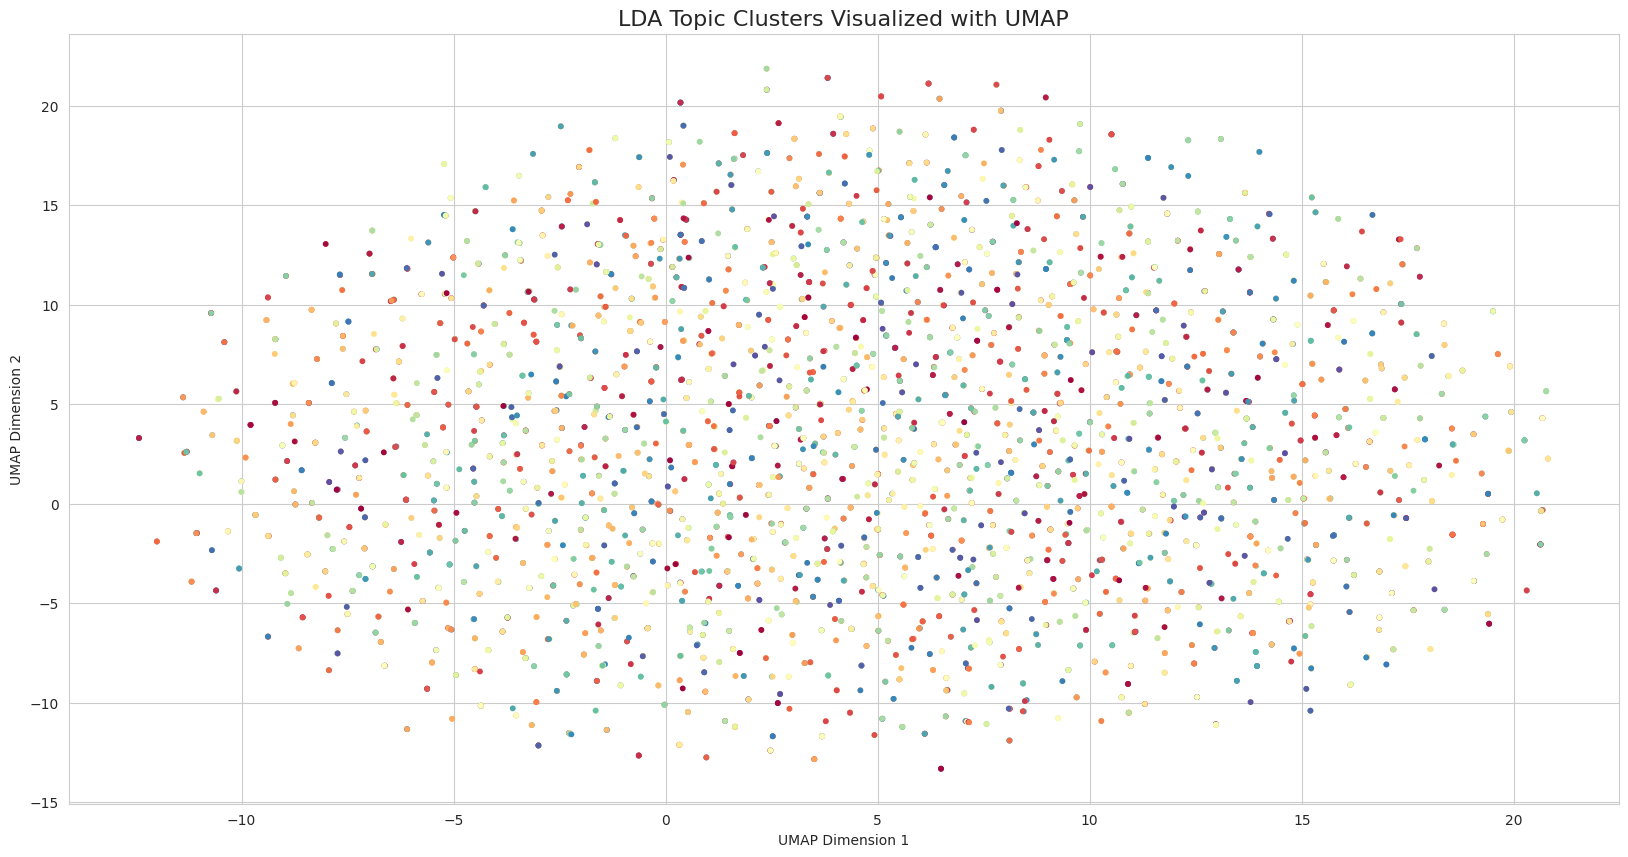

In [25]:
# --- Visualization Section ---
# Visualizing Topics with UMAP
print("\n" + "="*50)
print("Visualizing Topics with UMAP")
print("="*50)

print("\nCreating UMAP embedding...")
# Pass the correct document-topic matrix to UMAP.
embedding = umap.UMAP(n_neighbors=2, random_state=42).fit_transform(doc_topic_matrix_dense)

plt.figure(figsize=(20, 10))
# The title should be "LDA Topic Clusters" to match the model.
plt.title("LDA Topic Clusters Visualized with UMAP", fontsize=16)

# The 'c' parameter colors the points based on a document's category
# (using a category-like mapping for the sample data)
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=x_train["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


Visualizing Topics with t-SNE

Creating t-SNE embedding...


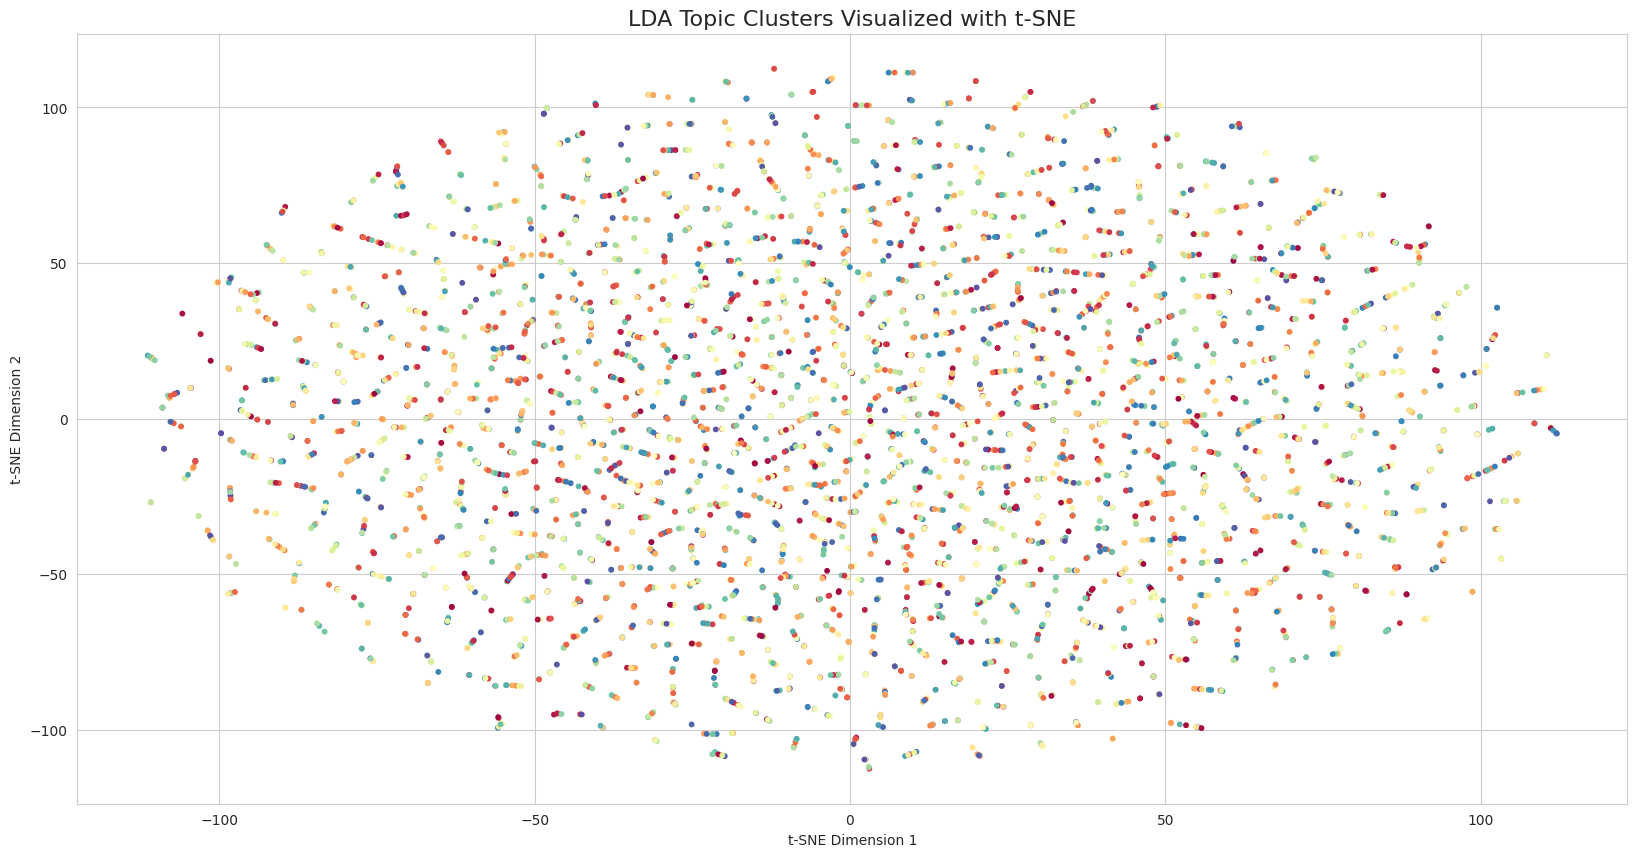

In [26]:
# --- Visualization Section ---
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

print("\nCreating t-SNE embedding...")
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
# Use the correct document-topic matrix for t-SNE
tsne_embedding = tsne_model.fit_transform(doc_topic_matrix_dense)

plt.figure(figsize=(20, 10))
# FIX: Change the title to reflect that you are using an LDA model
plt.title("LDA Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter colors the points based on a document's category
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_train["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## LDA Experiment

### What happen if we adjusting Hyperparameter for LDA (Topic Coherence)?


Adjust hyperparameters for LDA Model

> Training LDA model with 2 topics...
  Coherence Score: 0.3426

> Training LDA model with 3 topics...
  Coherence Score: 0.3608

> Training LDA model with 4 topics...
  Coherence Score: 0.3718

> Training LDA model with 5 topics...
  Coherence Score: 0.3962

> Training LDA model with 6 topics...
  Coherence Score: 0.3863

> Training LDA model with 7 topics...
  Coherence Score: 0.4103

> Training LDA model with 8 topics...
  Coherence Score: 0.4215

> Training LDA model with 9 topics...
  Coherence Score: 0.4133

Tuning Complete
Optimal number of topics (n_components): 8
Highest coherence score: 0.4215


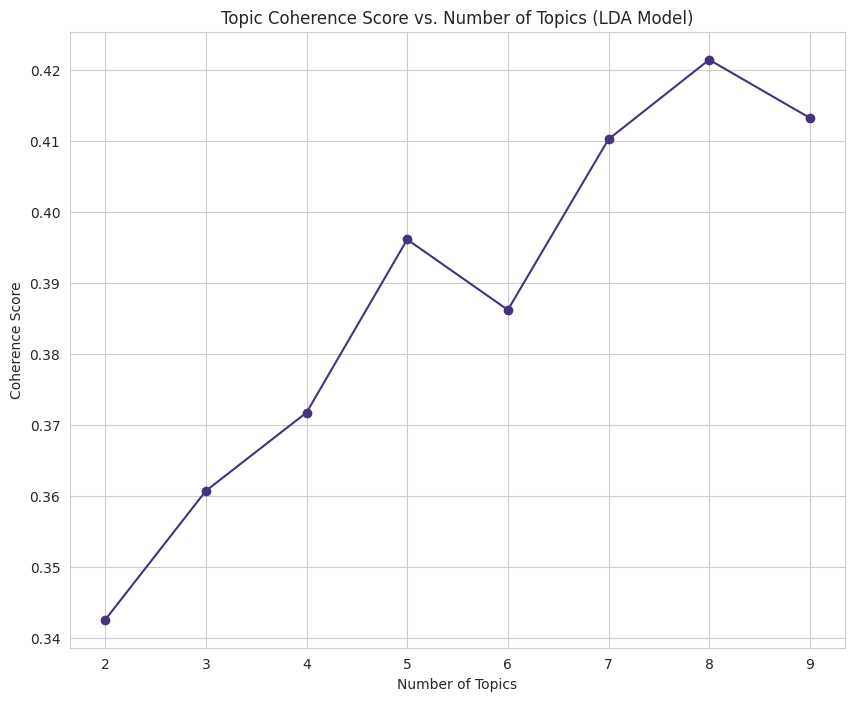

In [27]:
# Adjusting Hyperparameter for LDA (Topic Coherence)

print("\n" + "="*50)
print("Adjust hyperparameters for LDA Model")
print("="*50)

# Define a range for the number of topics to test
num_topics_range = range(2, 10)  # Use a small range for demonstration

coherence_scores = []
best_num_topics = -1
highest_coherence = -1

for num_topics in num_topics_range:
    print(f"\n> Training LDA model with {num_topics} topics...")
    
    # Train the LDA model
    lda_model = LdaModel(
        corpus=gensim_corpus,
        id2word=gensim_dictionary,
        num_topics=num_topics,
        random_state=100,
        passes=10,
        per_word_topics=True
    )
    
    # Get top words for each topic
    top_words_per_topic = []
    for topic_words in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
        topic_words_list = [word for word, prob in topic_words[1]]
        top_words_per_topic.append(topic_words_list)

    # Calculate coherence score
    coherence_model = CoherenceModel(
        topics=top_words_per_topic,
        texts=tokenized_docs,
        dictionary=gensim_dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"  Coherence Score: {coherence_score:.4f}")

    # Track the best model
    if coherence_score > highest_coherence:
        highest_coherence = coherence_score
        best_num_topics = num_topics

print("\n" + "="*50)
print("Tuning Complete")
print(f"Optimal number of topics (n_components): {best_num_topics}")
print(f"Highest coherence score: {highest_coherence:.4f}")
print("="*50)

# Optional: Plot the coherence scores
plt.figure(figsize=(10, 8))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title("Topic Coherence Score vs. Number of Topics (LDA Model)")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.xticks(num_topics_range)
plt.grid(True)
plt.show()

### Visualize the model with the best coherence score (LDA)

In [28]:
# --- START of Gensim LDA Model Creation ---

# Train the LDA Model
# We will use 3 topics as an example. You can tune this parameter later.
num_topics = 5
print(f"\nTraining LDA model with {num_topics} topics...")
lda_model = LdaModel(
    corpus=gensim_corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics,
    random_state=100,
    passes=10,
    per_word_topics=True
)


Training LDA model with 5 topics...



Visualizing Topics with t-SNE

Creating t-SNE embedding...


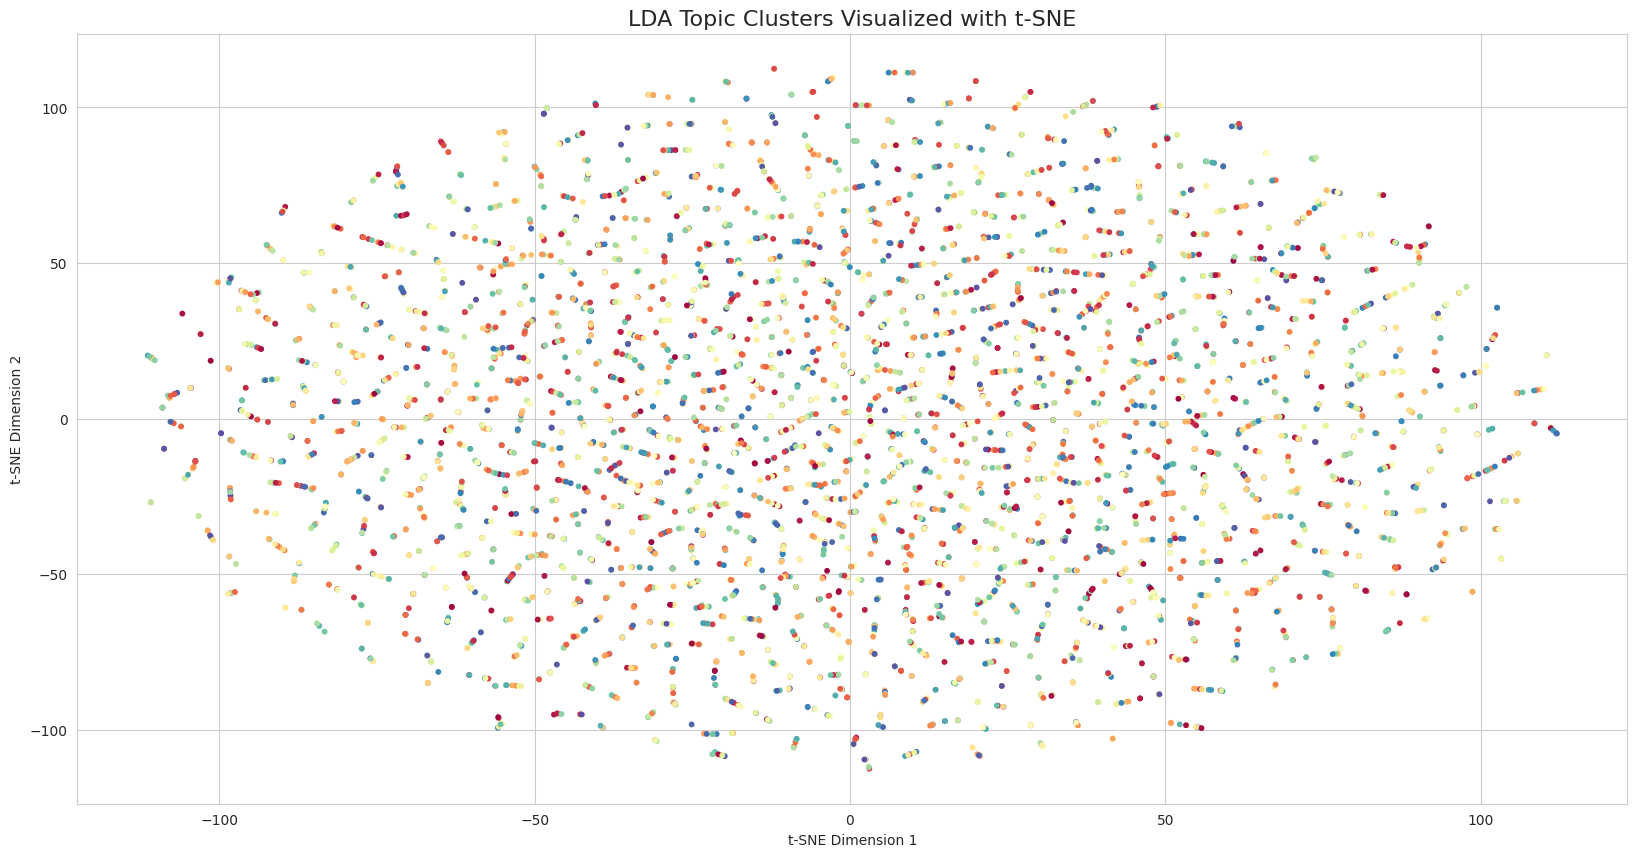

In [29]:
# --- Visualization Section ---
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

print("\nCreating t-SNE embedding...")
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
# Use the correct document-topic matrix for t-SNE
tsne_embedding = tsne_model.fit_transform(doc_topic_matrix_dense)

plt.figure(figsize=(20, 10))
# Change the title to reflect that you are using an LDA model
plt.title("LDA Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter colors the points based on a document's category
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_train["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

## Model Validation LDA

In [30]:
# Create Gensim dictionary and corpus
tokenized_docs = [doc.split() for doc in x_train['processed_summary']]
gensim_dictionary = Dictionary(tokenized_docs)
gensim_corpus = [gensim_dictionary.doc2bow(doc) for doc in tokenized_docs]

# Create LDA with best score
lda_model = LdaModel(
    corpus=gensim_corpus,
    id2word=gensim_dictionary,
    num_topics=8,
    random_state=100
)

print("Validating Model with Topic Coherence Score")
print("="*50)

# 1. Get top words for each topic using the correct Gensim method
top_words_per_topic = []
for topic_words in lda_model.show_topics(num_topics=-1, num_words=10, formatted=False):
    topic_words_list = [word for word, prob in topic_words[1]]
    top_words_per_topic.append(topic_words_list)

# 3. Calculate the coherence score
coherence_model_lda = CoherenceModel(
    topics=top_words_per_topic,
    texts=tokenized_docs,
    dictionary=gensim_dictionary,
    coherence='c_v'
)

coherence_score = coherence_model_lda.get_coherence()
print(f"The Topic Coherence Score for the LDA model is: {coherence_score:.4f}")

Validating Model with Topic Coherence Score
The Topic Coherence Score for the LDA model is: 0.3951


# Model Evaluation

**Topic Coherence**
Topic coherence is the most important quantitative metric. It measures how semantically consistent a topic's top words are with one another. A high coherence score means the top words in a topic are closely related and make sense to a human reader. For example, a topic with words like {"astronomy," "telescope," "planet," "star"} would have a high coherence score, while {"car," "apple," "tree," "computer"} would have a low one.

**Common coherence measures include:**

**Normalized Pointwise Mutual Information(C_V)**: A robust and widely used metric that calculates the co-occurrence of words within a sliding window of the documents.

**UMass**: A simpler measure based on the log of the conditional probability of one word appearing given another.

**In this note book will use Normalized Pointwise Mutual Information (C_V) to evaluate the model**

## Evaluating LDA Model on Test Data

In [31]:
# --- Evaluation on Test Data Section ---
print("\n" + "="*50)
print(f"Applying the model to Test document:")
# Corrected: Use .iloc[0] to access the first row by its integer position
print(f"Document: '{x_test['processed_summary'].iloc[0]}'")
print("="*50)

# Select the first document from the test set using .iloc
test_doc_text = x_test['processed_summary'].iloc[0]

# Tokenize the test document
tokenized_test_doc = test_doc_text.split()

# Convert to Gensim's bag-of-words format
test_doc_bow = gensim_dictionary.doc2bow(tokenized_test_doc)

# Get the topic distribution for the test document
doc_topics = lda_model.get_document_topics(test_doc_bow)

# Find the most likely topic
most_likely_topic = max(doc_topics, key=lambda item: item[1])

print(f"Topic distribution (Topic ID, Score): {doc_topics}")
print(f"The most likely topic is Topic {most_likely_topic[0] + 1} with a score of {most_likely_topic[1]:.4f}")

# --- REVISED CODE TO DISPLAY TOPIC WORDS ---
# Get the top words for the most likely topic
topic_words = lda_model.show_topic(most_likely_topic[0], topn=10)
topic_words_list = [(word, round(prob, 4)) for word, prob in topic_words]

print(f"\nTop words for Topic {most_likely_topic[0] + 1}:")
print(topic_words_list)


Applying the model to Test document:
Document: 'neural network emerge powerful tool solve complex task various domain increase size computational requirement pose significant challenge deploy resourceconstraine device neural network sparsification particular pruning emerge effective technique alleviate challenge reduce model size computational complexity memory footprint maintain competitive performance many prune pipeline modify standard training pipeline single stage work look develop endtoend training pipeline befit neural network pruning sparsification stage train make use nonstandard model parameter initialization preprune training methodology postprune training optimization conduct experiment utilize combination method addition different technique use prune step find combine pipeline achieve significant gain current state art approach neural network sparsification'
Topic distribution (Topic ID, Score): [(2, 0.13964479), (3, 0.35593477), (6, 0.497896)]
The most likely topic is To

In [32]:
# --- EVALUATION CODE ---

print("\n" + "="*50)
print("Evaluating LDA Model on Test Data")
print("="*50)

# Define the variable by tokenizing the test data
tokenized_docs_test = [doc.split() for doc in x_test['processed_summary']]

# 1. Get the top words for each topic from the TRAINED model
top_words_per_topic = []
for topic_words in lda_model.show_topics(num_topics=lda_model.num_topics, num_words=10, formatted=False):
    topic_words_list = [word for word, prob in topic_words[1]]
    top_words_per_topic.append(topic_words_list)

# 2. Convert test data to Gensim format using the TRAINING dictionary
gensim_corpus_test = [gensim_dictionary.doc2bow(doc) for doc in tokenized_docs_test]

# 3. Calculate the coherence score on the test set
coherence_model_lda_test = CoherenceModel(
    topics=top_words_per_topic,
    texts=tokenized_docs_test,
    dictionary=gensim_dictionary,
    coherence='c_v'
)

coherence_score_test = coherence_model_lda_test.get_coherence()
print(f"\nThe Topic Coherence Score for the LDA model on the TEST set is: {coherence_score_test:.4f}")


Evaluating LDA Model on Test Data

The Topic Coherence Score for the LDA model on the TEST set is: 0.3637


## Visualize LSI model on test dataset

## Prepared test dataset for visualize

In [33]:
# Create Gensim corpus for the test set using the same dictionary
gensim_corpus_test = [gensim_dictionary.doc2bow(doc) for doc in tokenized_docs_test]

# Get the topic distribution for all documents in the test set
# The output is a list of lists of tuples, one inner list for each document
doc_topics_test = [lda_model.get_document_topics(bow) for bow in gensim_corpus_test]

# Create a document-topic matrix from the test corpus topic distributions
num_topics = lda_model.num_topics
doc_topic_matrix_test = np.zeros((len(doc_topics_test), num_topics))
for i, topics in enumerate(doc_topics_test):
    for topic_id, score in topics:
        doc_topic_matrix_test[i, topic_id] = score

# Get the dominant topic ID for each test document
dominant_topic_ids = np.argmax(doc_topic_matrix_test, axis=1)


Visualizing Topics with UMAP

Creating UMAP embedding...


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


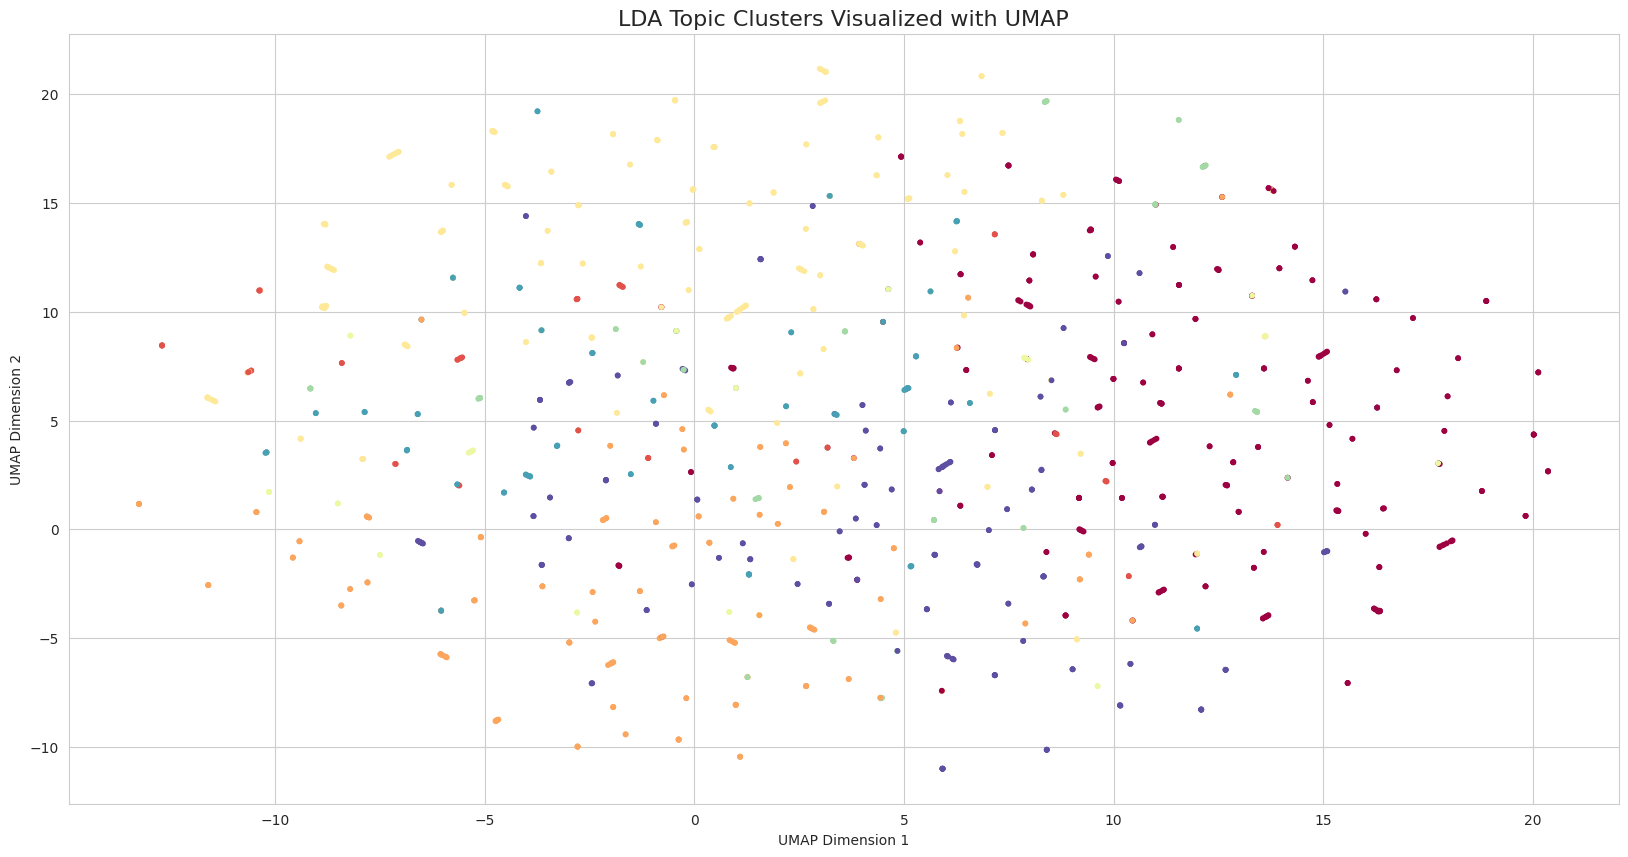

In [34]:
print("\n" + "="*50)
print("Visualizing Topics with UMAP")
print("="*50)

print("\nCreating UMAP embedding...")
# The UMAP model is created on the document-topic matrix of the test set
embedding = umap.UMAP(n_neighbors=2, random_state=42).fit_transform(doc_topic_matrix_test)

plt.figure(figsize=(20, 10))
plt.title("LDA Topic Clusters Visualized with UMAP", fontsize=16)

# Color the scatter plot based on the dominant topic ID
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=dominant_topic_ids,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


Visualizing Topics with t-SNE

Creating t-SNE embedding for test data...


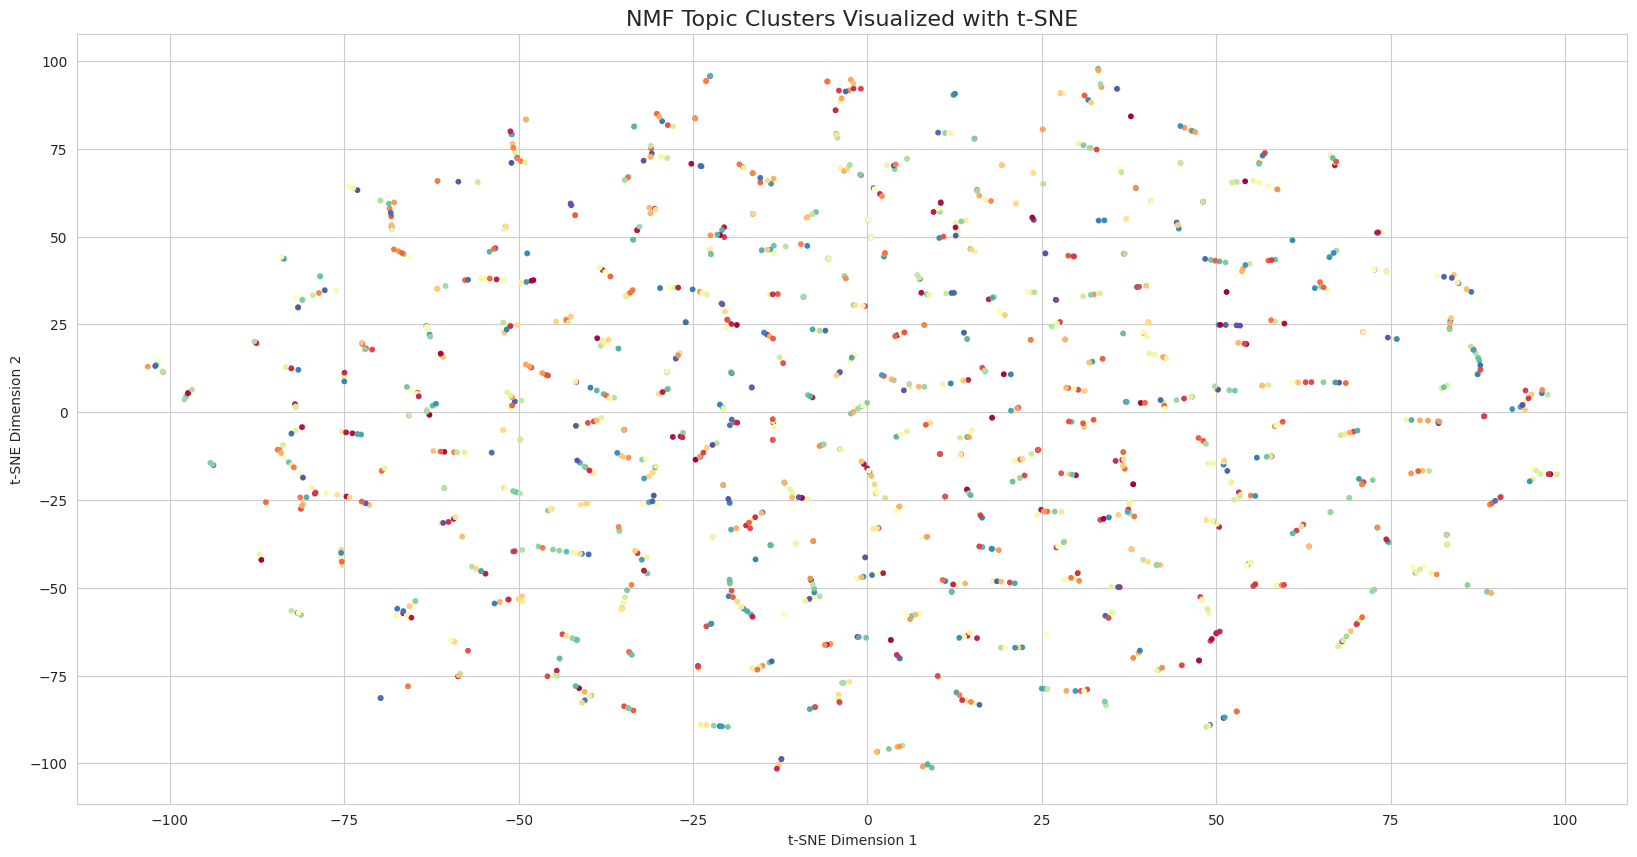

In [35]:
print("\n" + "="*50)
print("Visualizing Topics with t-SNE")
print("="*50)

print("\nCreating t-SNE embedding for test data...")
# The t-SNE model is created on the NMF output of the test set
tsne_model = TSNE(n_components=2, random_state=42, perplexity=2.0)
tsne_embedding = tsne_model.fit_transform(doc_topic_matrix_test)

plt.figure(figsize=(20, 10))
plt.title("NMF Topic Clusters Visualized with t-SNE", fontsize=16)

# The 'c' parameter now uses the test data
# Note: You need to create a new category for the test data for coloring.
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1],
            c=x_test["processed_summary"].astype('category').cat.codes,
            cmap='Spectral', alpha=1.0, s=10)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()